In [23]:
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Lambda
import matplotlib.pyplot as plt

In [24]:
# Sample data
data = ["I love to play football", "Football is a great game",
        "I enjoy watching football matches", "The team played well", 
        "Football brings people together"]

In [25]:
# a. Data Preparation
# Clean sentences
clean_sentences = [re.sub(r'[^A-Za-z0-9 ]+', '', sentence).lower() for sentence in data]

In [26]:
# Tokenize sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sentences)
sequences = tokenizer.texts_to_sequences(clean_sentences)
vocab_size = len(tokenizer.word_index) + 1

In [27]:
# b. Generate Training Data
# Create context-target pairs
contexts, targets = [], []
for sequence in sequences:
    for i in range(1, len(sequence) - 1):  # context window size = 2
        contexts.append([sequence[i-1], sequence[i+1]])  # context words
        targets.append(sequence[i])  # target word

X, Y = np.array(contexts), np.array(targets)

In [28]:
# c. Define the CBOW Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=10, input_length=2),  # context size = 2
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),  # Average the context word embeddings
    Dense(128, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [29]:
# d. Train the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1000 - loss: 2.9919 - val_accuracy: 0.0000e+00 - val_loss: 2.9979
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4000 - loss: 2.9870 - val_accuracy: 0.0000e+00 - val_loss: 3.0010
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4000 - loss: 2.9825 - val_accuracy: 0.0000e+00 - val_loss: 3.0040
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 2.9779 - val_accuracy: 0.0000e+00 - val_loss: 3.0069
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 2.9734 - val_accuracy: 0.0000e+00 - val_loss: 3.0096
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 2.9688 - val_accuracy: 0.0000e+00 - val_loss: 3.0119
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 2.9642 - val_accuracy: 0.0000e+00 - val_loss: 3.0143
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 2.9595 - val_accuracy: 

In [30]:
plt.figure(figsize=[12,5])

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

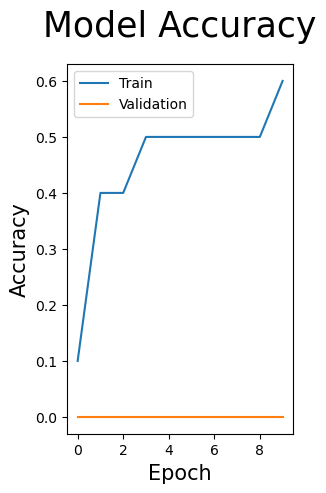

In [34]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['Train', 'Validation'], loc='upper left')

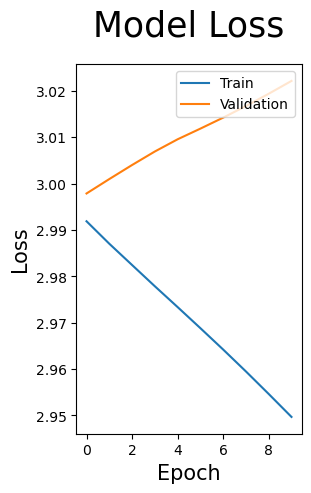

In [35]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [33]:
index_to_word = {i: word for word, i in tokenizer.word_index.items()}

def predict_word(context):
    prediction = model.predict(np.array(context).reshape(1, -1))
    return index_to_word[np.argmax(prediction)]

# Example prediction
print(f"Predicted word: {predict_word(X[0])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted word: enjoy
